In [2]:
import pandas as pd
import numpy as np
import scipy.stats
import statsmodels.api as sm
from pandasql import *
import pandasql
pd.set_option('max_row',10)
from ggplot import *
%matplotlib inline
import matplotlib.pyplot as plt 

In [3]:
sub=r"C:\Users\karthik\Downloads\turnstile_data_master_with_weather.csv"
df=pd.read_csv(sub,parse_dates=True)
df.columns

Index(['Unnamed: 0', 'UNIT', 'DATEn', 'TIMEn', 'Hour', 'DESCn', 'ENTRIESn_hourly', 'EXITSn_hourly', 'maxpressurei', 'maxdewpti', 'mindewpti', 'minpressurei', 'meandewpti', 'meanpressurei', 'fog', 'rain', 'meanwindspdi', 'mintempi', 'meantempi', 'maxtempi', 'precipi', 'thunder'], dtype='object')

In [4]:
df.DATEn.values

array(['2011-05-01', '2011-05-01', '2011-05-01', ..., '2011-05-30',
       '2011-05-30', '2011-05-30'], dtype=object)

In [5]:
df.DATEn.values

array(['2011-05-01', '2011-05-01', '2011-05-01', ..., '2011-05-30',
       '2011-05-30', '2011-05-30'], dtype=object)

In [6]:
df.columns

Index(['Unnamed: 0', 'UNIT', 'DATEn', 'TIMEn', 'Hour', 'DESCn', 'ENTRIESn_hourly', 'EXITSn_hourly', 'maxpressurei', 'maxdewpti', 'mindewpti', 'minpressurei', 'meandewpti', 'meanpressurei', 'fog', 'rain', 'meanwindspdi', 'mintempi', 'meantempi', 'maxtempi', 'precipi', 'thunder'], dtype='object')

In [7]:
rain=df.ENTRIESn_hourly[df.rain==0]
no_rain= df.ENTRIESn_hourly[df.rain==1]
M_r=np.mean(rain)
M_nr=np.mean(no_rain)
scipy.stats.mannwhitneyu(rain,no_rain)

(1924409167.0, 0.019309634413792565)

In [8]:
df['date']=pd.to_datetime(df['DATEn'])
df['week']=df.date.dt.weekday

In [9]:
df.columns

Index(['Unnamed: 0', 'UNIT', 'DATEn', 'TIMEn', 'Hour', 'DESCn', 'ENTRIESn_hourly', 'EXITSn_hourly', 'maxpressurei', 'maxdewpti', 'mindewpti', 'minpressurei', 'meandewpti', 'meanpressurei', 'fog', 'rain', 'meanwindspdi', 'mintempi', 'meantempi', 'maxtempi', 'precipi', 'thunder', 'date', 'week'], dtype='object')

In [10]:
#df.week
df.ENTRIESn_hourly
df1=df[['ENTRIESn_hourly','week','EXITSn_hourly']]
t=df1.groupby(['week'],as_index=False).sum()/30

In [11]:
t

,week,ENTRIESn_hourly,EXITSn_hourly
0,0.000000,804336.533333,644287.833333
1,0.033333,766598.466667,613753.400000
2,0.066667,785421.200000,629783.333333
3,0.100000,782888.300000,626406.366667
4,0.133333,771025.766667,618955.833333
5,0.166667,468136.833333,393638.100000
6,0.200000,439337.133333,374046.233333


In [12]:

#t.index.name='days_in_week'
t['week']=['mon','tue','wed','thu','fri','sat','sun']
#t.rename(index={6:'sun',0:'mon',1:'tue',2:'wed',3:'thu',4:'fri',5:'sat'})
#t.rename(columns={'ENTRIESn_hourly':'avg_number_entering/day','EXITSn_hourly':'avg_number_exiting/day'})
t.columns=['days_in_week','avg_number_entering/day','avg_number_exiting/day']

In [13]:
t


,days_in_week,avg_number_entering/day,avg_number_exiting/day
0,mon,804336.533333,644287.833333
1,tue,766598.466667,613753.400000
2,wed,785421.200000,629783.333333
3,thu,782888.300000,626406.366667
4,fri,771025.766667,618955.833333
5,sat,468136.833333,393638.100000
6,sun,439337.133333,374046.233333


In [14]:
p=ggplot(aes(x='days_in_week',y='avg_number_entering/day'),data=t)+geom_bar(position = 'stack',stat="identity")+ggtitle('avg num of people enterying the subway')+labs('days_in_week','avg_number_entering/day')

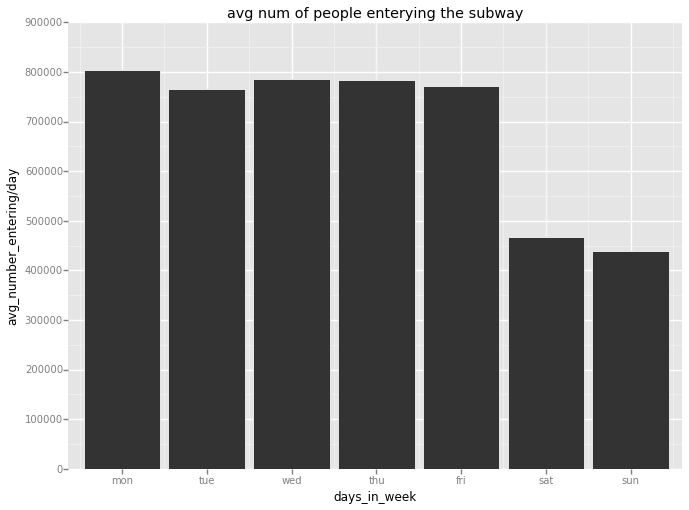

<ggplot: (-9223372036842292974)>

In [15]:
p

In [16]:
a,b=t['avg_number_entering/day'][0:5].sum(),t['avg_number_entering/day'][5:].sum()

In [17]:
weekdays=pd.DataFrame({'avg_number_entering/day':[a,b],'days_in_week':['weekdays','weekend']})

In [18]:
weekdays

,avg_number_entering/day,days_in_week
0,3910270.266667,weekdays
1,907473.966667,weekend


In [19]:
#ggplot(aes(x='days_in_week',y='avg_number_entering/day'),data=weekdays)+ geom_bar(position = 'stack',stat="identity")+ggtitle("weekdays vs weekends")+labs('days_in_week','avg_number_entering/day')

(-1.0000000186016107,
 1.1698131028390986,
 -1.1137351467371908,
 0.92593566103863434)

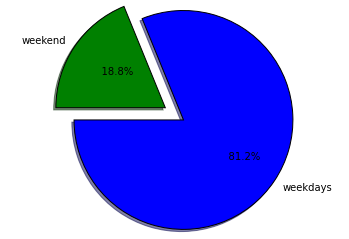

In [20]:
labels=['weekdays','weekend']
sizes=[a,b]
colors=['blue','green']
exlore=[.2,0]
plt.pie(sizes,explode=exlore,labels=labels,colors=colors,autopct='%8.1f%%', shadow=True, startangle=180)
#plt.axes('equal')
plt.axis('equal')


In [21]:
df2=df[['UNIT', 'date','ENTRIESn_hourly','Hour']]

In [22]:
df2.head(8000)

,UNIT,date,ENTRIESn_hourly,Hour
0,R001,2011-05-01,0,1
1,R001,2011-05-01,217,5
2,R001,2011-05-01,890,9
3,R001,2011-05-01,2451,13
4,R001,2011-05-01,4400,17
...,...,...,...,...
7995,R547,2011-05-02,242,21
7996,R547,2011-05-02,667,21
7997,R547,2011-05-02,50,22
7998,R547,2011-05-02,277,22


In [23]:
d=df2['date'].dt.day
d

0    1
1    1
2    1
...
131948    30
131949    30
131950    30
Length: 131951, dtype: int64

In [24]:
b=df2.groupby(('date'),as_index=False).sum()
b.date.dt.day


0    1
1    2
2    3
...
27    28
28    29
29    30
Length: 30, dtype: int64

In [25]:
type(b)


pandas.core.frame.DataFrame

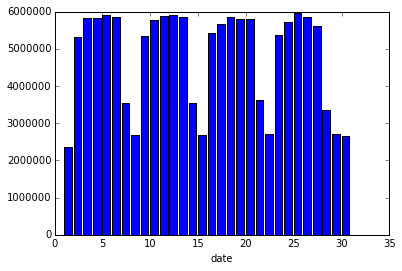

In [26]:
plt.bar(list(range(1,31)),b.ENTRIESn_hourly)
plt.xlabel("date")

In [27]:
df3=df2[['UNIT','ENTRIESn_hourly']]

In [28]:
u=df3.groupby(('UNIT'),as_index=False).sum()
#top=u.ENTRIESn_hourly.order(ascending=False)
#u.head(5)
u['ENTRIESn_hourly']=u.ENTRIESn_hourly/30
top=u.sort_index(ascending=False,by=['ENTRIESn_hourly'])
top=top.set_index('UNIT')

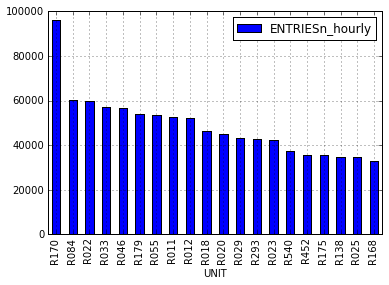

In [29]:
top[:20].plot(kind='bar')

In [30]:
df4=df[['UNIT','ENTRIESn_hourly','Hour']]


In [31]:
top_station=['R170','R084','R022','R033','R046']
top_station

['R170', 'R084', 'R022', 'R033', 'R046']

In [32]:
top.head(5)


,ENTRIESn_hourly
UNIT,
R170,96263.933333
R084,60314.100000
R022,59897.733333
R033,57055.433333
R046,56505.000000


In [33]:
improve_data=pd.read_csv(r'C:\Users\karthik\Downloads\improved-dataset\improved-dataset\turnstile_weather_v2.csv')

In [34]:
a=improve_data['UNIT']=='ROO3'
improve_data=improve_data[['hour','ENTRIESn']]

In [35]:
a=improve_data.groupby('hour').sum()
a

,ENTRIESn
hour,
0,216862631393
4,229520337472
8,120606392772
12,211938175384
16,208696319376
20,211873138374


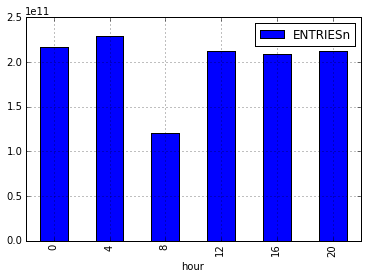

In [36]:
a.plot(kind='bar')

In [37]:
df4

,UNIT,ENTRIESn_hourly,Hour
0,R001,0,1
1,R001,217,5
2,R001,890,9
3,R001,2451,13
4,R001,4400,17
...,...,...,...
131946,R552,19,23
131947,R552,158,23
131948,R552,54,23
131949,R552,59,23


In [38]:
q=df4[df4.UNIT=='R170']

In [39]:
q

,UNIT,ENTRIESn_hourly,Hour
979,R170,0,1
980,R170,4762,5
981,R170,1774,9
982,R170,8118,13
983,R170,18906,17
...,...,...,...
128584,R170,1520,9
128585,R170,6674,13
128586,R170,3,13
128587,R170,17175,17


In [40]:
z=q[['ENTRIESn_hourly','Hour']]

In [41]:
w=z.groupby('Hour')

In [42]:
for key , da in w:
    print (key) 
    print (da)

1
        ENTRIESn_hourly  Hour
979                   0     1
5477               9637     1
9928              17124     1
14338             16664     1
18793             15835     1
...                 ...   ...
111158            17902     1
115623            20210     1
119886            19330     1
124212            15237     1
128582            12565     1

[33 rows x 2 columns]
5
        ENTRIESn_hourly  Hour
980                4762     5
5478               1239     5
9929               7523     5
14339              8612     5
18794              1336     5
...                 ...   ...
111159             4195     5
115624             5178     5
119887             4125     5
124213             4219     5
128583             2523     5

[30 rows x 2 columns]
7
       ENTRIESn_hourly  Hour
14340                0     7
36297               16     7
49538              157     7
49539              143     7
67022               40     7
97905              158     7
8
       ENTRIESn_hourly 

In [43]:
z.Hour.values

array([ 1,  5,  9, 13, 17, 21,  1,  5,  9, 13, 17, 21,  1,  5,  9, 13, 13,
       17, 17, 21, 22,  1,  5,  7,  8,  9, 12, 13, 13, 17, 17, 21,  1,  5,
        9, 13, 17, 17, 21,  1,  5,  9, 12, 13, 16, 17, 21, 21,  1,  5,  9,
       13, 13, 17, 21,  1,  5,  9, 13, 15, 17, 21,  1,  5,  7,  8,  9, 13,
       13, 17, 17, 21,  1,  5,  9,  9, 13, 17, 21, 23,  1,  5,  9, 10, 13,
       17, 21, 23,  1,  5,  7,  7,  9, 10, 13, 14, 17, 17, 21,  1,  5,  9,
       11, 13, 14, 14, 17, 17, 21,  1,  1,  5,  9, 11, 13, 17, 17, 21,  1,
        1,  5,  9, 13, 16, 17, 21, 21,  1,  5,  7,  9, 10, 13, 13, 17, 17,
       21,  1,  5,  9, 13, 13, 17, 21,  1,  5,  9, 10, 13, 13, 17, 18, 21,
        1,  1,  5,  9, 13, 14, 17, 17, 21,  1,  5,  9,  9, 13, 14, 17, 17,
       21,  1,  5,  9, 13, 17, 21, 22,  1,  5,  9, 13, 14, 17, 21, 22,  1,
        5,  7,  9, 13, 17, 21,  1,  5,  9, 13, 17, 21,  1,  5,  9, 11, 13,
       13, 17, 21,  1,  5,  9, 12, 13, 17, 17, 21,  1,  5,  9, 11, 13, 13,
       17, 21,  1,  5,  9

In [44]:
data=pd.read_csv(r'C:\Users\karthik\Downloads\turnstile_data_master_with_weather.csv')

In [45]:
data.columns


Index(['Unnamed: 0', 'UNIT', 'DATEn', 'TIMEn', 'Hour', 'DESCn', 'ENTRIESn_hourly', 'EXITSn_hourly', 'maxpressurei', 'maxdewpti', 'mindewpti', 'minpressurei', 'meandewpti', 'meanpressurei', 'fog', 'rain', 'meanwindspdi', 'mintempi', 'meantempi', 'maxtempi', 'precipi', 'thunder'], dtype='object')

In [46]:
rain=data[['ENTRIESn_hourly','rain']][data['rain']==1]
no_rain= data[['ENTRIESn_hourly','rain']][data['rain']==0]

In [47]:
rain=rain.reset_index()
no_rain=no_rain.reset_index()

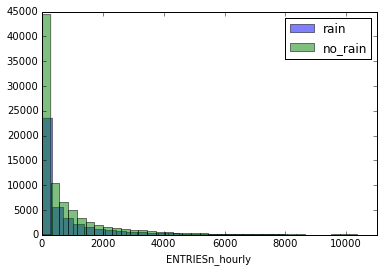

In [48]:
plt.hist(rain.ENTRIESn_hourly,bins=150,alpha=.50,label='rain')
plt.hist(no_rain.ENTRIESn_hourly,bins=150,alpha=.50,label='no_rain')
plt.xlabel('ENTRIESn_hourly')
plt.xlim(0,11000)
plt.legend(loc='upper right')
plt.show()

#plt.title('rainy_day')


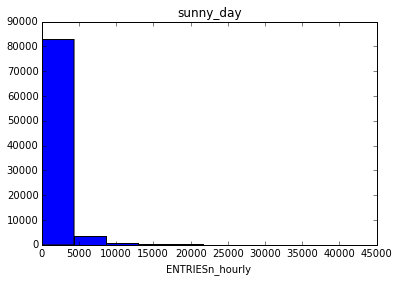

In [49]:
plt.hist(no_rain['ENTRIESn_hourly'])
plt.xlabel('ENTRIESn_hourly')
plt.title('sunny_day')
plt.xscale('linear')

In [50]:
rain.ENTRIESn_hourly

0    1132
1     164
2     647
...
44101     54
44102     59
44103    123
Name: ENTRIESn_hourly, Length: 44104, dtype: float64